## HW 5
## 1-1a)

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import auc
from sklearn.ensemble import RandomForestClassifier



In [2]:
# Import the data set
df_Ht = pd.read_csv(r"C:\Users\Katabatic\Desktop\DATA 3550\Heart.csv")
df_Ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [3]:
df_Ht.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
# I don't know enough about this subject to make a call on if I should put the average values in or not.
# Because of this, I am just going to drop the rows that are missing data.
# I am also going to drop the Unnamed column because it is just another indexing column. 

df_Ht = df_Ht.dropna()
df_Ht = df_Ht.drop(['Unnamed: 0'], axis = 1)
df_Ht.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [5]:
# I had two columns of categorical variables that I need to change into dummy variables. 
# The code below will convert the three columns
df_Ht = pd.get_dummies(df_Ht, columns=['ChestPain', 'Thal'])

In [6]:
df_Ht.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     297 non-null    int64  
 1   Sex                     297 non-null    int64  
 2   RestBP                  297 non-null    int64  
 3   Chol                    297 non-null    int64  
 4   Fbs                     297 non-null    int64  
 5   RestECG                 297 non-null    int64  
 6   MaxHR                   297 non-null    int64  
 7   ExAng                   297 non-null    int64  
 8   Oldpeak                 297 non-null    float64
 9   Slope                   297 non-null    int64  
 10  Ca                      297 non-null    float64
 11  AHD                     297 non-null    object 
 12  ChestPain_asymptomatic  297 non-null    uint8  
 13  ChestPain_nonanginal    297 non-null    uint8  
 14  ChestPain_nontypical    297 non-null    ui

After processing the data, we are left with 297 rows of data and 19 variables for the target. 

## 1-1b

In [7]:
# The code below creates the data frames for our x and y variables and then splits the datasets into training and testing

X = df_Ht.drop('AHD', axis = 1) #keep features only for X
y = df_Ht['AHD'] #keep target variable only for y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [8]:
y.head()

0     No
1    Yes
2    Yes
3     No
4     No
Name: AHD, dtype: object

In [9]:
X.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,0,1,0,0,1,0


## 1-2a

In [10]:
# The code below makes an instance of the tree, then we fit the model, and lastly we make predictions on the test set. 

model = DecisionTreeClassifier(random_state=21)
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

print(model_pred)

['No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No'
 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes']


In [11]:
# The code below is just turning the predictions into a df. 
model_pred = pd.DataFrame(model_pred)
model_pred = model_pred.rename(columns = {0:'Predict_Tree'})


display(model_pred.sample(5, random_state=244))

,Predict_Tree
46,Yes
22,Yes
62,Yes
30,No
44,No


In [12]:
# The code below combines the predictions with the actual test set. 
# I included all the columns so I could see everything
# The first five rows look pretty good.
df_model_results = pd.concat([X_test, y_test], axis = 1 )
df_model_results = df_model_results.reset_index()
df_model_results = pd.concat([df_model_results, model_pred], axis = 1 )

display(model_pred.head())
df_model_results.head()

,Predict_Tree
0,No
1,Yes
2,No
3,Yes
4,No


,index,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD,Predict_Tree
0,169,45,0,112,160,0,0,138,0,0.0,...,0.0,0,0,1,0,0,1,0,No,No
1,214,52,1,112,230,0,0,160,0,0.0,...,1.0,1,0,0,0,0,1,0,Yes,Yes
2,63,54,0,135,304,1,0,170,0,0.0,...,0.0,0,1,0,0,0,1,0,No,No
3,155,70,1,130,322,0,2,109,0,2.4,...,3.0,1,0,0,0,0,1,0,Yes,Yes
4,5,56,1,120,236,0,0,178,0,0.8,...,0.0,0,0,1,0,0,1,0,No,No


## 1-2b

In [13]:
score = model.score(X_train, y_train)
model_pred = model.predict(X_train)
train_accuracy = model.score(X_train, y_train)
train_conf_matrix = confusion_matrix(y_train, model_pred)
train_sensitivity = train_conf_matrix[1, 1] / (train_conf_matrix[1, 1] + train_conf_matrix[1, 0])
train_specificity = train_conf_matrix[0, 0] / (train_conf_matrix[0, 0] + train_conf_matrix[0, 1])
print(f'Train accuracy: {train_accuracy} \nTrain sensitivity: {train_sensitivity}\nTrain Specificity: {train_specificity}')
      

Train accuracy: 1.0 
Train sensitivity: 1.0
Train Specificity: 1.0


These results mean that we are perfectly fitting the training data. The bad news is that we are most likely overfitting. Our bias is very small, but we will see how the variance is. 

In [14]:
test_score = model.score(X_test, y_test)
test_model_pred = model.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, test_model_pred)
test_sensitivity = test_conf_matrix[1, 1] / (test_conf_matrix[1, 1] + test_conf_matrix[1, 0])
test_specificity = test_conf_matrix[0, 0] / (test_conf_matrix[0, 0] + test_conf_matrix[0, 1])


print(f'Test Accuracy: {test_score}')
print(f'Test Sensitivity: {test_sensitivity}')
print(f'Test Specificity: {test_specificity}\n')

Test Accuracy: 0.7222222222222222
Test Sensitivity: 0.7317073170731707
Test Specificity: 0.7142857142857143



We are overfitting the training data as seen by these results. We have no bias, but a large variance. Many sources differ on what the bar is for minimum model accuracy, but .8 looks to be like a bare minimum and our current model is only achieving 72% accuracy. 

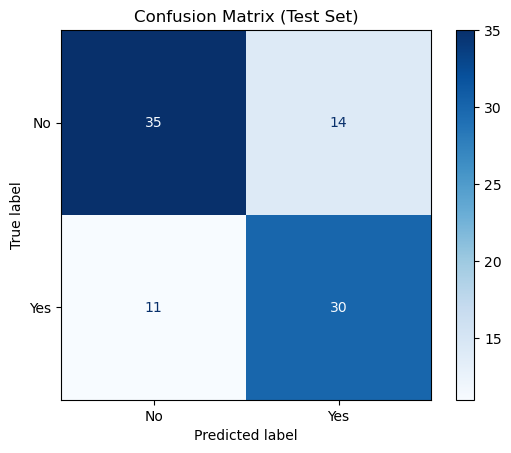


Classification Report (Test Set):
              precision    recall  f1-score   support

          No       0.76      0.71      0.74        49
         Yes       0.68      0.73      0.71        41

    accuracy                           0.72        90
   macro avg       0.72      0.72      0.72        90
weighted avg       0.72      0.72      0.72        90



In [15]:
# the code below plots the confusion matrix and then prints the summary results
confusion_mat = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['No', 'Yes'])
confusion_mat.plot(cmap="Blues", values_format='d')
plt.title('Confusion Matrix (Test Set)')
plt.show()

print('\nClassification Report (Test Set):')
print(classification_report(y_test, test_model_pred))
plt.show()

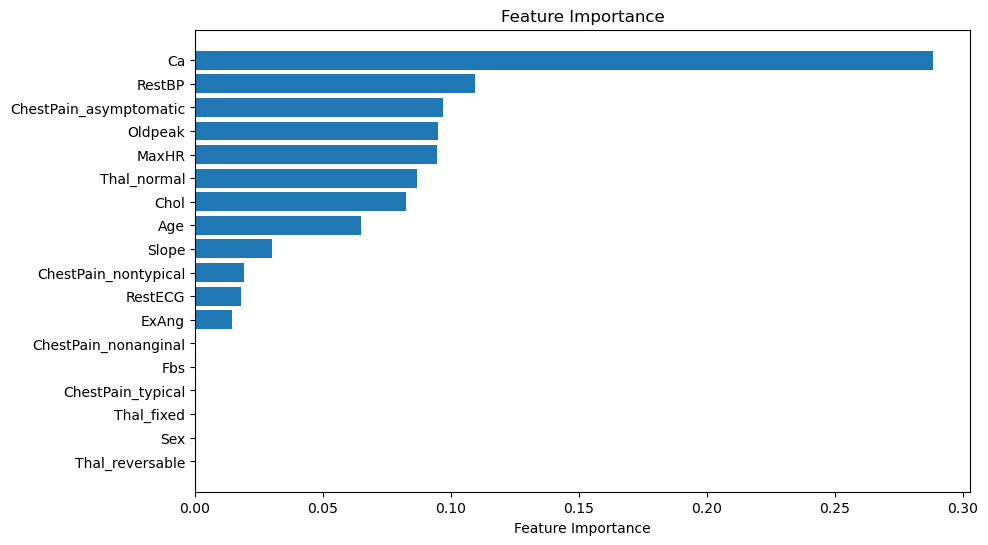

In [16]:
# Variable importance plot
feat_importances = model.feature_importances_
features = X.columns
indices = np.argsort(feat_importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), feat_importances[indices], align="center")
plt.yticks(range(len(indices)), features[indices])
plt.xlabel("Feature Importance")
plt.show()

## 1-3a

In [17]:
# Identify the most important features
top_features_indices = np.argsort(feat_importances)[-7:]
top_features = X.columns[top_features_indices]

# Extract the training data with only the most important features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Use t7_y_train and t7_y_test for the target variable in the train-test split
t7_X_train, t7_X_test, t7_y_train, t7_y_test = train_test_split(X_train_top, y_train, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree model using the most important features
model_top_features = DecisionTreeClassifier(random_state=21)
model_top_features.fit(t7_X_train, t7_y_train)

# Print the top features
print(top_features)

Index(['Chol', 'Thal_normal', 'MaxHR', 'Oldpeak', 'ChestPain_asymptomatic',
       'RestBP', 'Ca'],
      dtype='object')


## 1-3b

In [18]:
# Make predictions on the training set using the model with the most important features
train_predictions_top_features = model_top_features.predict(t7_X_train)

# Calculate accuracy, sensitivity, and specificity on the training data
train_accuracy_top_features = model_top_features.score(t7_X_train, t7_y_train)
train_conf_matrix_top_features = confusion_matrix(t7_y_train, train_predictions_top_features)
train_sensitivity_top_features = train_conf_matrix_top_features[1, 1] / (train_conf_matrix_top_features[1, 1] + train_conf_matrix_top_features[1, 0])
train_specificity_top_features = train_conf_matrix_top_features[0, 0] / (train_conf_matrix_top_features[0, 0] + train_conf_matrix_top_features[0, 1])

# Display the results
print(f'Training Set Metrics with Top 7 Features:')
print(f'Train Accuracy: {train_accuracy_top_features}')
print(f'Train Sensitivity: {train_sensitivity_top_features}')
print(f'Train Specificity: {train_specificity_top_features}\n')





Training Set Metrics with Top 7 Features:
Train Accuracy: 1.0
Train Sensitivity: 1.0
Train Specificity: 1.0



We are still fitting the training data perfectly so the bias is very low, zero infact. What worries me is like before, we are probably overfitting the training data set. 

## 1-3c

In [19]:
# Display the training accuracy of the model with all predictors
print(f'Training Accuracy with All Predictors: {train_accuracy}')
print(f'Training Accuracy with Top 7 Features: {train_accuracy_top_features}\n')

Training Accuracy with All Predictors: 1.0
Training Accuracy with Top 7 Features: 1.0



The training accuracy is the same with both models

## 1-3d

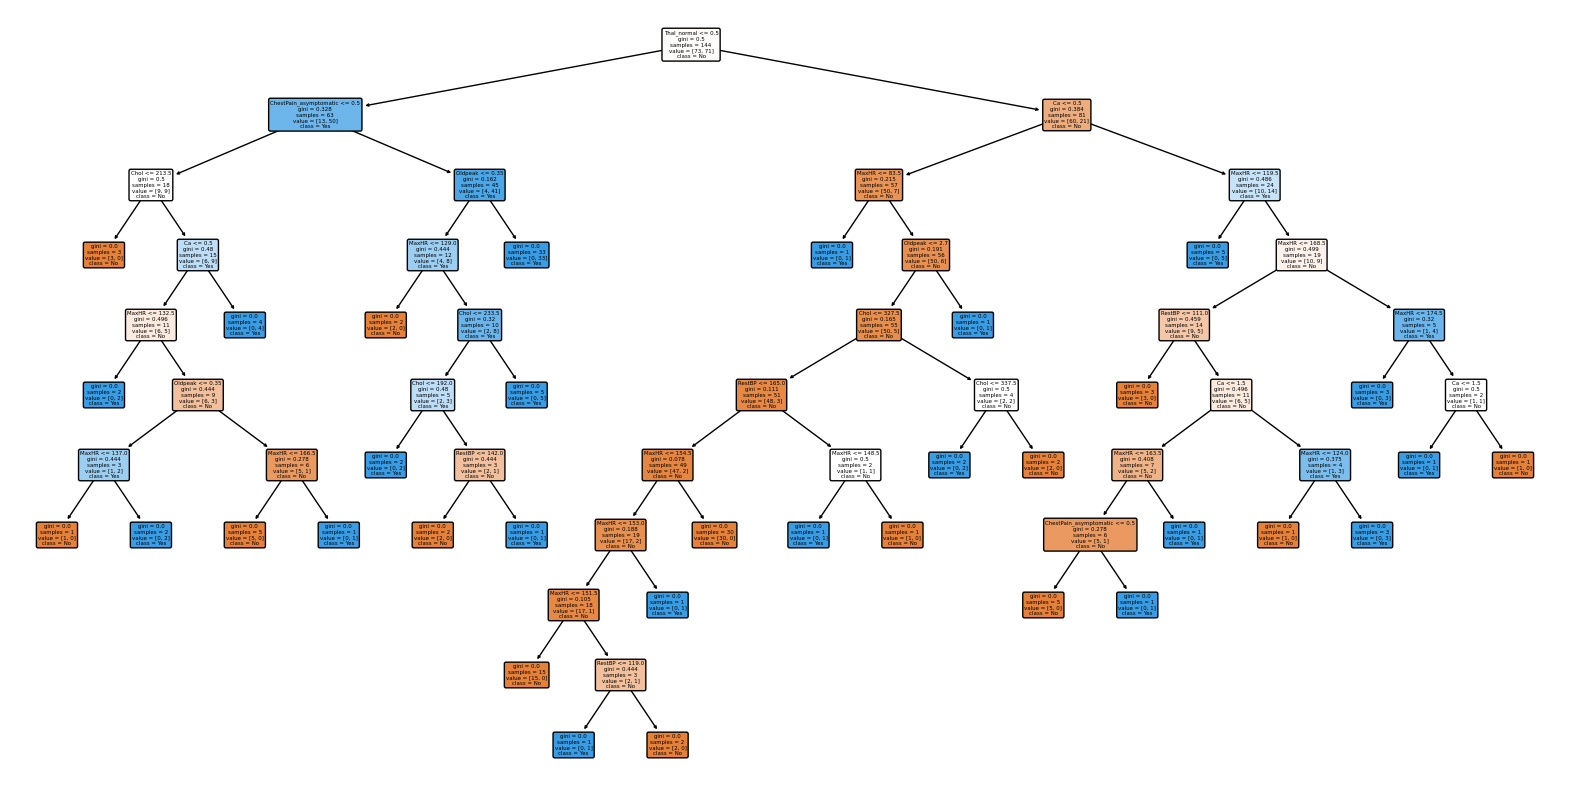

In [20]:
plt.figure(figsize=(20, 10))
plot_tree(model_top_features, filled=True, feature_names=top_features, class_names=['No', 'Yes'], rounded=True)
plt.show()

Here we see that our tree is fairly large so it is hard to see all the wording, but we can see that Ca is the most important feature since it is the first split. 

## 1-3e

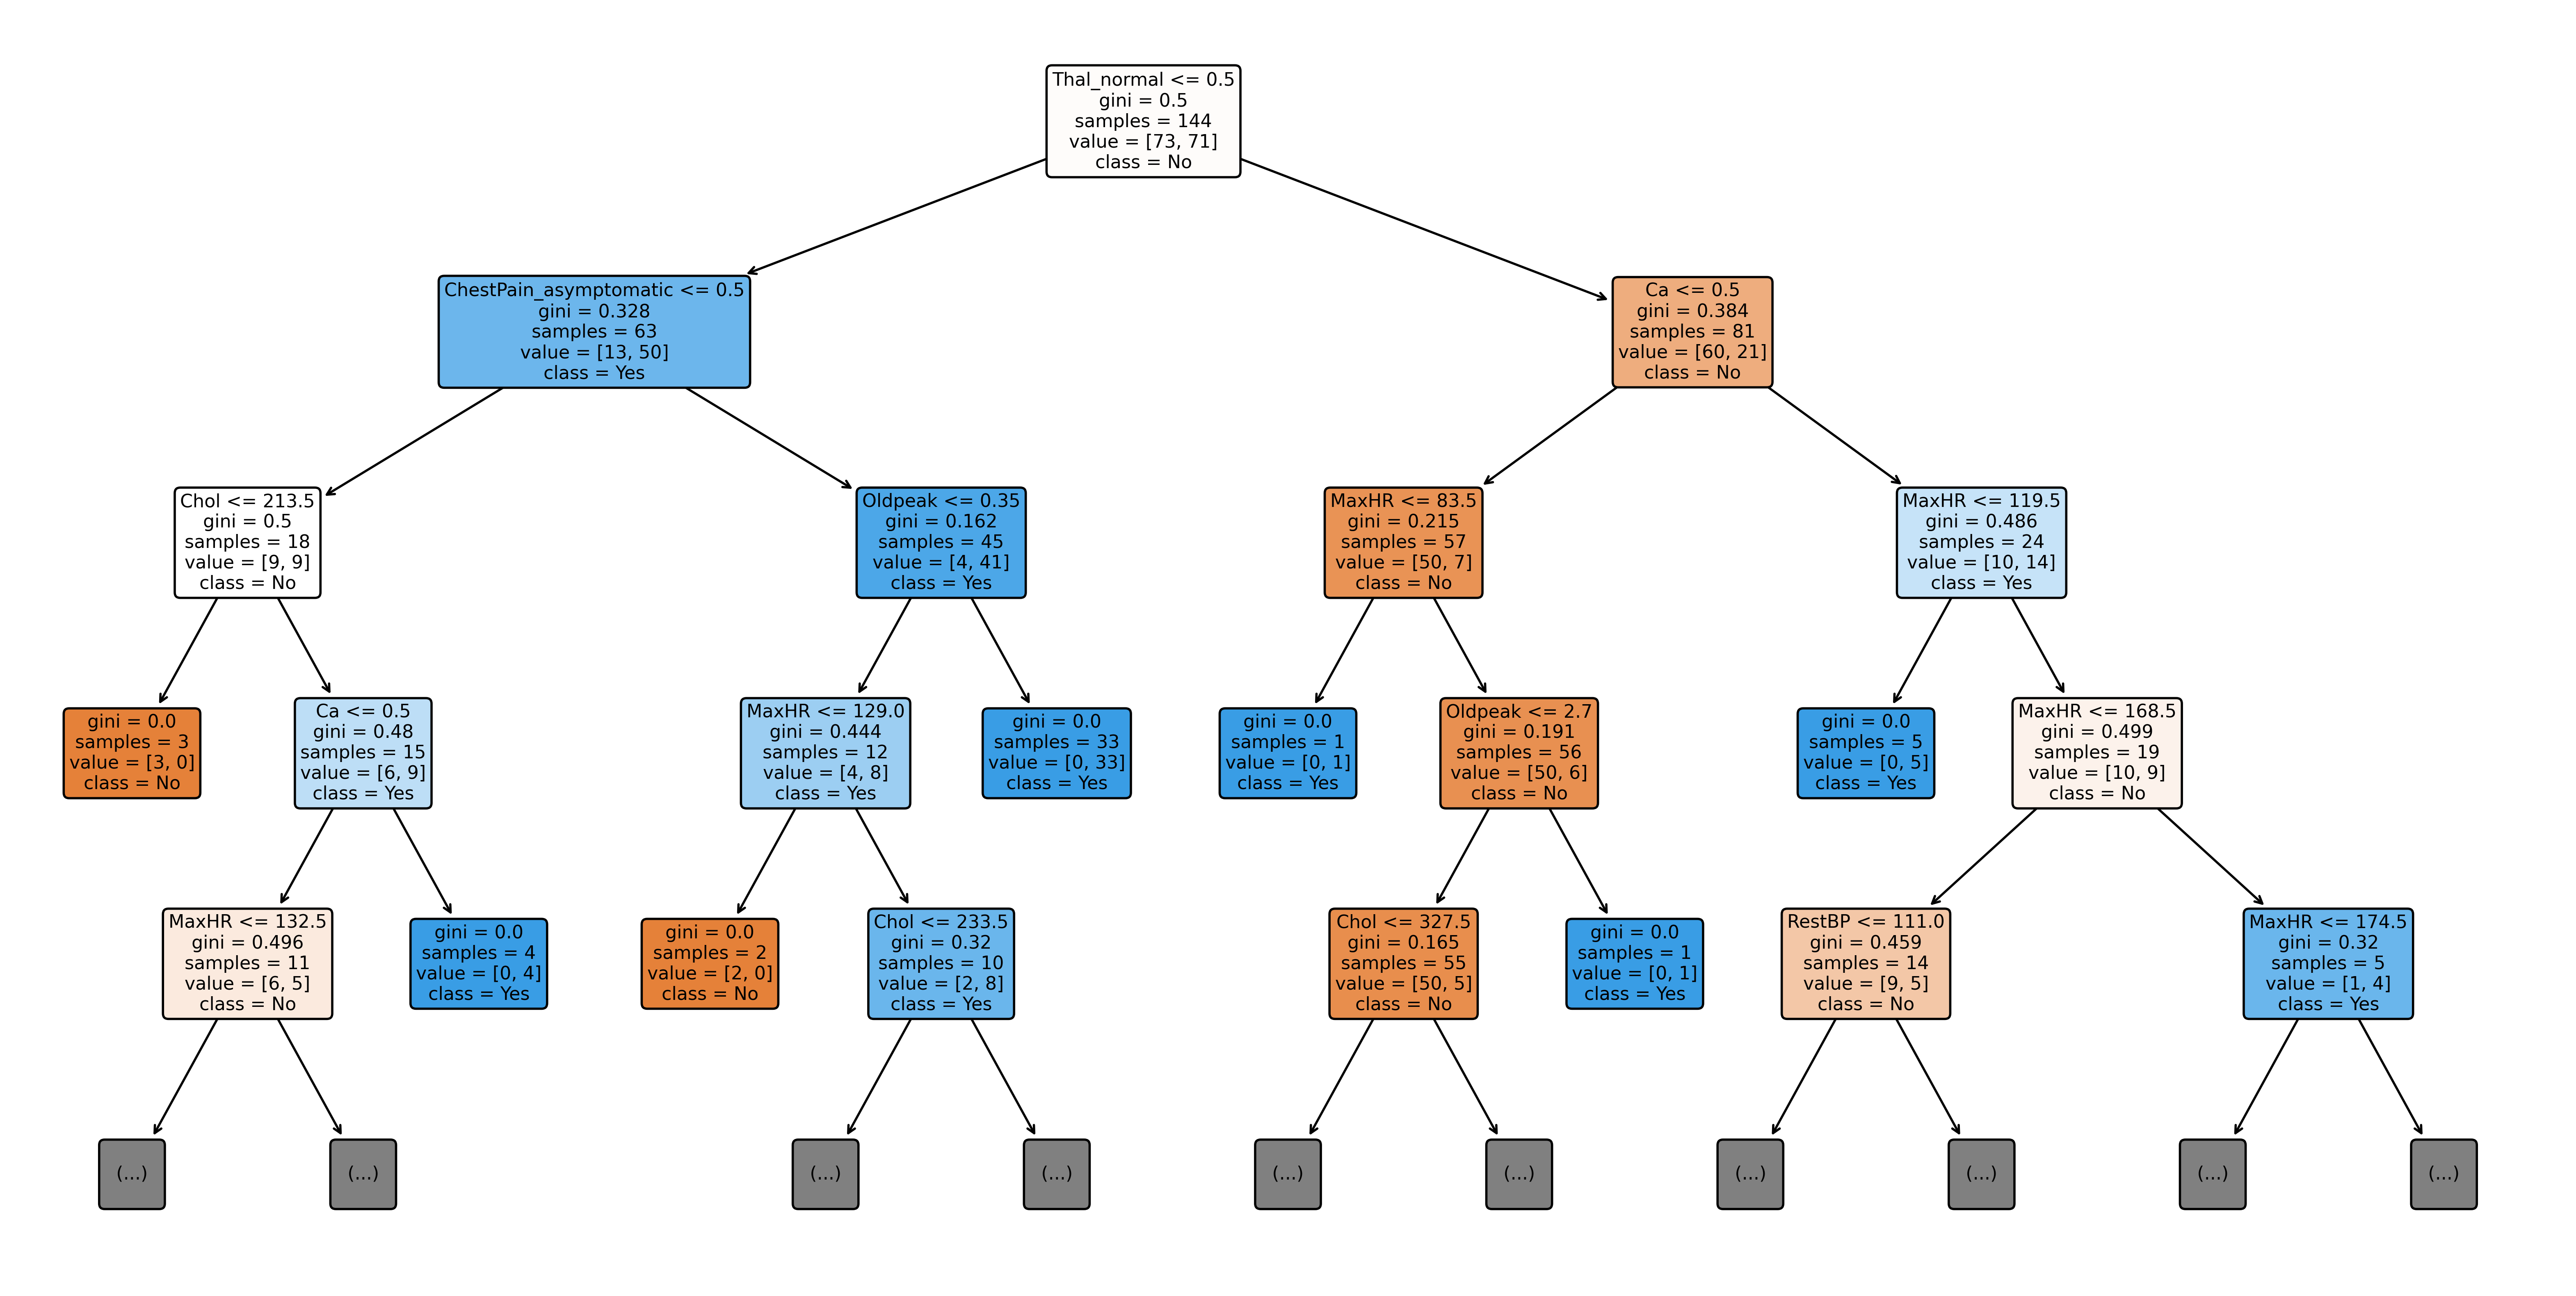

In [21]:
from sklearn.tree import plot_tree

plt.rcParams['text.color'] = 'black'
plt.figure(figsize=(20, 10), dpi=400)

plot_tree(model_top_features, 
          filled=True, 
          rounded=True,
          fontsize=8,  # Adjust the font size
          class_names=["No", "Yes"], 
          feature_names=top_features,
          max_depth=4)  # Limit the depth of the tree for better visualization
plt.show()

If we look at the leaf node after Chol <= 299.0 terminal node, it has a gini score of zero which means that it is perfectly pure in the split. There are two samples in this terminal node that are classified as yes. 

## 1-4a, b, and c

Test Set Metrics with Top 7 Features:
Test Accuracy: 0.7936507936507936
Test Sensitivity: 0.88
Test Specificity: 0.7368421052631579



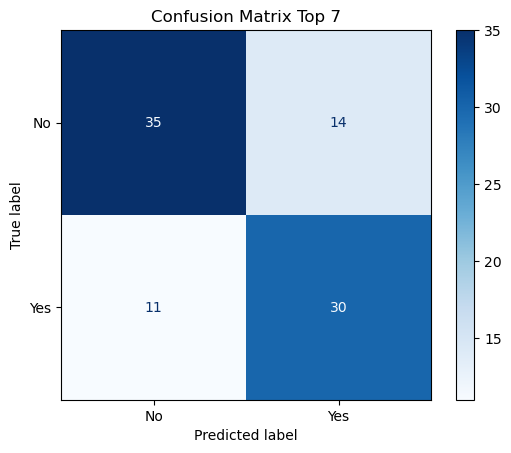


Classification Report Top 7:
              precision    recall  f1-score   support

          No       0.90      0.74      0.81        38
         Yes       0.69      0.88      0.77        25

    accuracy                           0.79        63
   macro avg       0.80      0.81      0.79        63
weighted avg       0.82      0.79      0.80        63



In [22]:
# Make predictions on the test set using the model with the most important features
test_predictions_top_features = model_top_features.predict(t7_X_test)

# Calculate accuracy, sensitivity, and specificity on the test data
test_accuracy_top_features = model_top_features.score(t7_X_test, t7_y_test)
test_conf_matrix_top_features = confusion_matrix(t7_y_test, test_predictions_top_features)
test_sensitivity_top_features = test_conf_matrix_top_features[1, 1] / (test_conf_matrix_top_features[1, 1] + test_conf_matrix_top_features[1, 0])
test_specificity_top_features = test_conf_matrix_top_features[0, 0] / (test_conf_matrix_top_features[0, 0] + test_conf_matrix_top_features[0, 1])

# Display the results
print(f'Test Set Metrics with Top 7 Features:')
print(f'Test Accuracy: {test_accuracy_top_features}')
print(f'Test Sensitivity: {test_sensitivity_top_features}')
print(f'Test Specificity: {test_specificity_top_features}\n')

# the code below plots the confusion matrix and then prints the summary results
confusion_mat = ConfusionMatrixDisplay(test_conf_matrix, display_labels=['No', 'Yes'])
confusion_mat.plot(cmap="Blues", values_format='d')
plt.title('Confusion Matrix Top 7')
plt.show()

print('\nClassification Report Top 7:')
print(classification_report(t7_y_test, test_predictions_top_features))
plt.show()

We are achieving the exact same results as the previous model. The good news is that we can interperet the model easier now. I think the model does a reasonable job for how simple it is. Our specificity is the lowest, so if we are mostly concerned about type one errors, we would need to improve the model. 

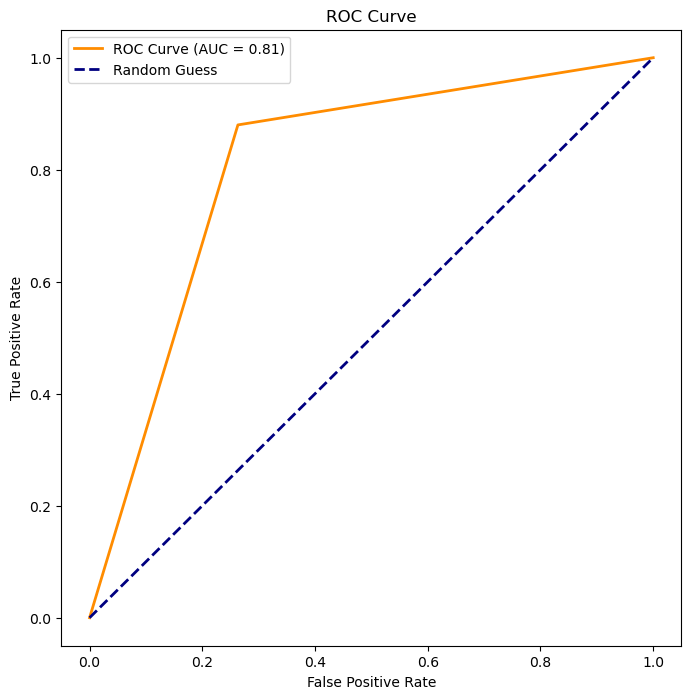

In [23]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical labels to binary (0 and 1)
label_encoder = LabelEncoder()
t7_y_test_binary = label_encoder.fit_transform(t7_y_test)

# Get predicted probabilities for the positive class
test_probs = model_top_features.predict_proba(t7_X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(t7_y_test_binary, test_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



The ROC is pretty good at .81. This means our model is better at predicting the classes than if we were to just randomly guess. 

## 2-1a

In [24]:
X = df_Ht.drop('AHD', axis = 1) #keep features only for X
y = df_Ht['AHD'] #keep target variable only for y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 2-1b, c

In [25]:
# Make predictions on the test set
rf_test_predictions = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = rf_model.score(X_test, y_test)

# Calculate confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_test_predictions)

# Calculate sensitivity and specificity
rf_sensitivity = rf_conf_matrix[1, 1] / (rf_conf_matrix[1, 1] + rf_conf_matrix[1, 0])
rf_specificity = rf_conf_matrix[0, 0] / (rf_conf_matrix[0, 0] + rf_conf_matrix[0, 1])

# Display the results
print(f'Random Forest Metrics on Test Set:')
print(f'Accuracy: {rf_accuracy}')
print(f'Sensitivity: {rf_sensitivity}')
print(f'Specificity: {rf_specificity}\n')

Random Forest Metrics on Test Set:
Accuracy: 0.8444444444444444
Sensitivity: 0.8292682926829268
Specificity: 0.8571428571428571



These are definitely better that just the single tree model. Two of the metrics have improved, with the biggest improvement being specificity. True postives and true negatives have increased, giving us a better accuracy score. The only thing that went down was sensitivity which means we are making more type two errors, but our type one errors have decreases balancing the errors. 

## 2-2a

In [26]:
# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create Random Forest model
rf_model_cv = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(rf_model_cv, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Display the best parameters
print(f'Best Parameters from Grid Search: {grid_search.best_params_}\n')

Best Parameters from Grid Search: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}



C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Katabatic\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Katabatic\anaco

## 2-2b

In [27]:
# Extract the best parameters from the grid search
best_params = grid_search.best_params_

# Create Random Forest model with best parameters
rf_model_best = RandomForestClassifier(random_state=42, **best_params)

# Perform repeated 5-fold cross-validation
rkf = RepeatedKFold(n_splits=5, n_repeats=30, random_state=42)
cv_results = cross_val_score(rf_model_best, X, y, cv=rkf, scoring='accuracy')

# Display the average accuracy obtained on the hold-out fold
average_accuracy_cv = np.mean(cv_results)
print(f'Average Accuracy on Hold-out Folds: {average_accuracy_cv}\n')

Average Accuracy on Hold-out Folds: 0.8141148775894539



As we can see, the accuracy is very similar to the accuracy we have had from the models before. This means that our model is consistant and fairly robust. 

## 3

In [28]:
# Extract the best parameters from the grid search
best_params = grid_search.best_params_

# Create Random Forest model with best parameters
rf_model_best = RandomForestClassifier(random_state=42, **best_params)

# Perform repeated 5-fold cross-validation
rkf = RepeatedKFold(n_splits=5, n_repeats=30, random_state=42)

# Lists to store results
specificities = []
sensitivities = []

# Iterate through cross-validation folds
for train_index, test_index in rkf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training set
    rf_model_best.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model_best.predict(X_test)

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Extract values from the confusion matrix
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    TP = conf_matrix[1, 1]

    # Calculate specificity and sensitivity for this fold
    specificity = TN / (TN + FP)
    sensitivity = TP / (TP + FN)

    # Append results to lists
    specificities.append(specificity)
    sensitivities.append(sensitivity)

# Calculate average specificity and sensitivity
average_specificity = np.mean(specificities)
average_sensitivity = np.mean(sensitivities)

# Display the results
print(f'Average Specificity: {average_specificity}')
print(f'Average Sensitivity: {average_sensitivity}\n')

Average Specificity: 0.8533299374405847
Average Sensitivity: 0.7705434712017939



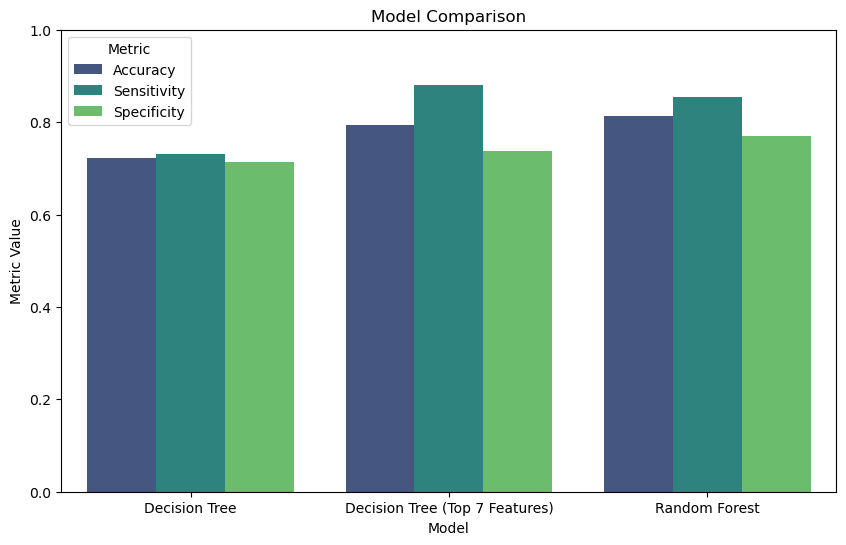

In [29]:
# Data for the comparison
models = ['Decision Tree', 'Decision Tree (Top 7 Features)', 'Random Forest']
accuracies = [test_score, test_accuracy_top_features, average_accuracy_cv]
sensitivities = [test_sensitivity, test_sensitivity_top_features, average_specificity]  
specificities = [test_specificity, test_specificity_top_features, average_sensitivity]





# Create a DataFrame for easy plotting

data = {'Model': models, 'Accuracy': accuracies, 'Sensitivity': sensitivities, 'Specificity': specificities}
df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting
df_melted = pd.melt(df, id_vars='Model', var_name='Metric', value_name='Value')

# Plot the comparison using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette='viridis')
plt.title('Model Comparison')
plt.ylabel('Metric Value')
plt.ylim(0, 1)  # Assuming metrics are in the range [0, 1]
plt.legend(title='Metric')
plt.show()

In [32]:
print('Single Tree All Vars:')
print(f'Test Accuracy: {test_score}')
print(f'Test Sensitivity: {test_sensitivity}')
print(f'Test Specificity: {test_specificity}\n')
print(f'Test Set Metrics with Top 7 Features:')
print(f'Test Accuracy: {test_accuracy_top_features}')
print(f'Test Sensitivity: {test_sensitivity_top_features}')
print(f'Test Specificity: {test_specificity_top_features}\n')
print('Random Forest:')
print(f'Average Accuracy on Hold-out Folds: {average_accuracy_cv}')
print(f'Average Specificity: {average_specificity}')
print(f'Average Sensitivity: {average_sensitivity}\n')

Single Tree All Vars:
Test Accuracy: 0.7222222222222222
Test Sensitivity: 0.7317073170731707
Test Specificity: 0.7142857142857143

Test Set Metrics with Top 7 Features:
Test Accuracy: 0.7936507936507936
Test Sensitivity: 0.88
Test Specificity: 0.7368421052631579

Random Forest:
Average Accuracy on Hold-out Folds: 0.8141148775894539
Average Specificity: 0.8533299374405847
Average Sensitivity: 0.7705434712017939



I created this visualization to compare the models we created. We can see how Random Forest was able to balance out the errors well .